In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from config import DATA_PATH, FEATURES, TARGET
from features import FEATURE_DICT
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df =pd.read_csv(DATA_PATH)

In [4]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
FEATURE_DICT

{'Invoice ID': 'INVOICE_ID',
 'Branch': 'BRANCH',
 'City': 'CITY',
 'Customer type': 'CUSTOMER_TYPE',
 'Gender': 'GENDER',
 'Product line': 'PRODUCT_LINE',
 'Unit price': 'UNIT_PRICE',
 'Quantity': 'QUANTITY',
 'Tax 5%': 'TAX',
 'Total': 'TOTAL',
 'Date': 'DATE',
 'Time': 'TIME',
 'Payment': 'PAYMENT',
 'cogs': 'COST_OF_GOODS_SOLD',
 'gross margin percentage': 'GROSS_MARGIN_PERCENTAGE',
 'gross income': 'GROSS_INCOME',
 'Rating': 'RATING'}

In [6]:
df.rename(columns=FEATURE_DICT, inplace=True)

In [7]:
df.columns

Index(['INVOICE_ID', 'BRANCH', 'CITY', 'CUSTOMER_TYPE', 'GENDER',
       'PRODUCT_LINE', 'UNIT_PRICE', 'QUANTITY', 'TAX', 'TOTAL', 'DATE',
       'TIME', 'PAYMENT', 'COST_OF_GOODS_SOLD', 'GROSS_MARGIN_PERCENTAGE',
       'GROSS_INCOME', 'RATING'],
      dtype='object')

In [8]:
def k_fold_cross_validation(df, train_size):
    x_train, x_test, y_train, y_test = train_test_split(
        df[FEATURES], df[TARGET], random_state=1, train_size=train_size
    )
    print(f"x_train has {x_train.shape[0]} rows and {x_train.shape[1]} columns")
    print(f"y_train has {y_train.shape[0]} rows and 1 columns")
    print(f"x_test has {x_test.shape[0]} rows and {x_test.shape[1]} columns")
    print(f"y_test has {y_test.shape[0]} rows and 1 columns")
    return x_train, x_test, y_train, y_test

In [9]:
x_train, x_test, y_train, y_test = k_fold_cross_validation(df, 0.25)

x_train has 250 rows and 16 columns
y_train has 250 rows and 1 columns
x_test has 750 rows and 16 columns
y_test has 750 rows and 1 columns


C:\dev\virtual\gcp_prep\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 4.761904762 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\dev\virtual\gcp_prep\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 4.761904762 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\dev\virtual\gcp_prep\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 4.761904762 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='UNIT_PRICE', ylabel='UNIT_PRICE'>,
        <AxesSubplot:xlabel='QUANTITY', ylabel='UNIT_PRICE'>,
        <AxesSubplot:xlabel='TAX', ylabel='UNIT_PRICE'>,
        <AxesSubplot:xlabel='TOTAL', ylabel='UNIT_PRICE'>,
        <AxesSubplot:xlabel='COST_OF_GOODS_SOLD', ylabel='UNIT_PRICE'>,
        <AxesSubplot:xlabel='GROSS_MARGIN_PERCENTAGE', ylabel='UNIT_PRICE'>,
        <AxesSubplot:xlabel='GROSS_INCOME', ylabel='UNIT_PRICE'>],
       [<AxesSubplot:xlabel='UNIT_PRICE', ylabel='QUANTITY'>,
        <AxesSubplot:xlabel='QUANTITY', ylabel='QUANTITY'>,
        <AxesSubplot:xlabel='TAX', ylabel='QUANTITY'>,
        <AxesSubplot:xlabel='TOTAL', ylabel='QUANTITY'>,
        <AxesSubplot:xlabel='COST_OF_GOODS_SOLD', ylabel='QUANTITY'>,
        <AxesSubplot:xlabel='GROSS_MARGIN_PERCENTAGE', ylabel='QUANTITY'>,
        <AxesSubplot:xlabel='GROSS_INCOME', ylabel='QUANTITY'>],
       [<AxesSubplot:xlabel='UNIT_PRICE', ylabel='TAX'>,
        <AxesSubplot:xlabel='QUANTITY', y

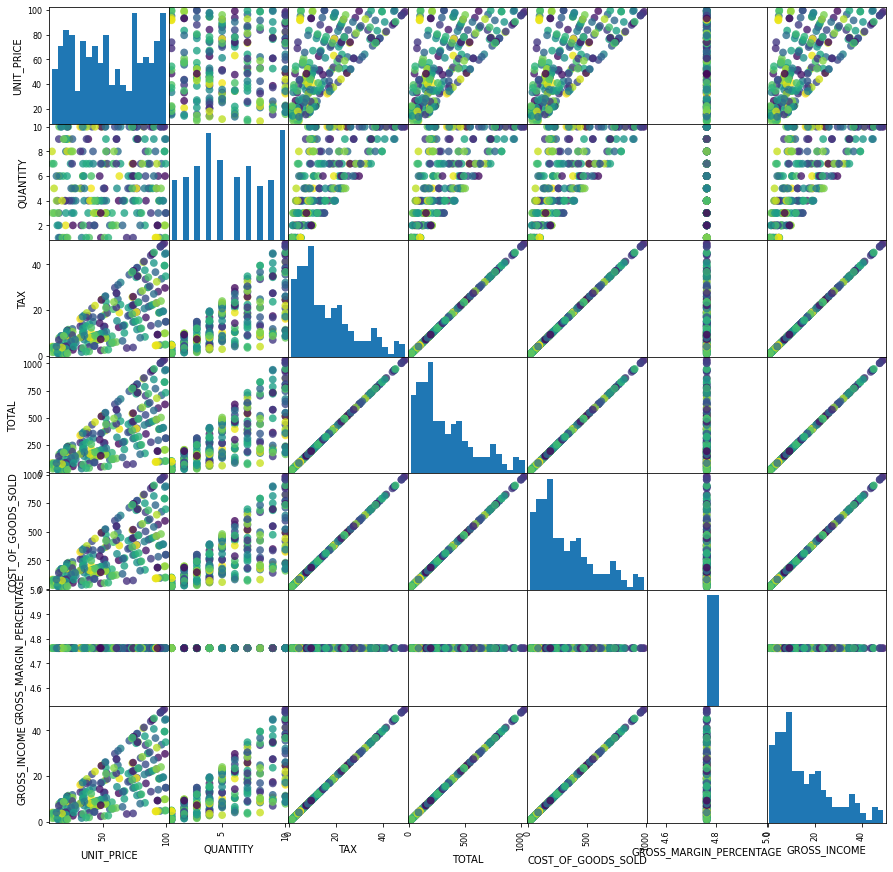

In [53]:
data = pd.DataFrame(x_train, columns=FEATURES)
pd.plotting.scatter_matrix(data, c=y_train, figsize=(15, 15), marker='o', s=60, hist_kwds={'bins': 20}, alpha=.8)

In [11]:
knn = KNeighborsRegressor(n_neighbors=1)

In [12]:
y_train.index

Int64Index([596, 520,  32, 611, 109, 136, 330, 222,  28, 287,
            ...
            960, 847, 645, 715, 905, 767,  72, 908, 235,  37],
           dtype='int64', length=250)

In [13]:
# knn.fit(x_train, y_train.index)

In [14]:
# ?KNeighborsRegressor

In [15]:
# ??KNeighborsRegressor

In [16]:
for column in df.columns:
    if column == TARGET:
        print("****** found Target ******")
    else:
        print(f"{column} not target")

INVOICE_ID not target
BRANCH not target
CITY not target
CUSTOMER_TYPE not target
GENDER not target
PRODUCT_LINE not target
UNIT_PRICE not target
QUANTITY not target
TAX not target
TOTAL not target
DATE not target
TIME not target
PAYMENT not target
COST_OF_GOODS_SOLD not target
GROSS_MARGIN_PERCENTAGE not target
GROSS_INCOME not target
****** found Target ******


In [17]:
df.columns

Index(['INVOICE_ID', 'BRANCH', 'CITY', 'CUSTOMER_TYPE', 'GENDER',
       'PRODUCT_LINE', 'UNIT_PRICE', 'QUANTITY', 'TAX', 'TOTAL', 'DATE',
       'TIME', 'PAYMENT', 'COST_OF_GOODS_SOLD', 'GROSS_MARGIN_PERCENTAGE',
       'GROSS_INCOME', 'RATING'],
      dtype='object')

In [18]:
columns_list = df.columns.to_list()

In [19]:
# dropping Target
columns_list.remove(TARGET)

In [20]:
# adding Target
columns_list.append(TARGET)

In [21]:
isinstance(df.columns, object)

True

In [22]:
def test_dataframe():
    return pd.DataFrame(data=["A", "A", "B"], columns=["feature"])

In [23]:
test_df = test_dataframe()

In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feature  3 non-null      object
dtypes: object(1)
memory usage: 152.0+ bytes


In [25]:
??isinstance

In [26]:
isinstance(test_df['feature'], object)

True

In [27]:
test_df

,feature
0,A
1,A
2,B


In [28]:
students = {'tom', 'barry'}
languages = {'english', 'spanish'}

In [29]:
students | languages

{'barry', 'english', 'spanish', 'tom'}

In [30]:
my_dict = dict(zip(students, languages))

In [31]:
my_dict

{'tom': 'spanish', 'barry': 'english'}

In [32]:
my_string = 'what is your name'

In [33]:
for i in  my_string.split():
    print(i)

what
is
your
name


In [34]:
my_name = 'Michelle Marie Conway'

In [35]:
names_list = [x for x in my_name.split()]

In [36]:
[x for x in my_name.split() if x=='Conway']

['Conway']

In [37]:
names_list

['Michelle', 'Marie', 'Conway']

In [38]:
[x.lower() for x in names_list]

['michelle', 'marie', 'conway']

In [39]:
for i in my_name.split():
    print(i)

Michelle
Marie
Conway


In [40]:
sorted(my_name)

[' ',
 ' ',
 'C',
 'M',
 'M',
 'a',
 'a',
 'c',
 'e',
 'e',
 'e',
 'h',
 'i',
 'i',
 'l',
 'l',
 'n',
 'o',
 'r',
 'w',
 'y']

In [41]:
cities = [['Galway', 'Dublin'], 'London', 'Munich']
counties = ['Ireland', 'UK', 'Germany']

In [42]:
city_dict = dict(zip(counties, cities))

In [43]:
city_dict

{'Ireland': ['Galway', 'Dublin'], 'UK': 'London', 'Germany': 'Munich'}

In [44]:
dict(A3= 4)

{'A3': 4}

In [45]:
{"A4": 4}

{'A4': 4}